In [12]:
# Improt nessesary libs
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statistics

from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)



In [13]:
# Reading the prepared date from CSV file step adding_job_cat_location_match_columns 
# into a DataFrame
df = pd.read_csv('datasetsalary2024_modified.csv')


In [14]:
print(df)

       work_year experience_level employment_type                  job_title  \
0           2024               SE              FT                AI Engineer   
1           2024               SE              FT                AI Engineer   
2           2024               SE              FT              Data Engineer   
3           2024               SE              FT              Data Engineer   
4           2024               SE              FT  Machine Learning Engineer   
...          ...              ...             ...                        ...   
16529       2020               SE              FT             Data Scientist   
16530       2021               MI              FT   Principal Data Scientist   
16531       2020               EN              FT             Data Scientist   
16532       2020               EN              CT      Business Data Analyst   
16533       2021               SE              FT       Data Science Manager   

        salary salary_currency  salary_

In [15]:
print(df['job_seniority'])

0        Engineer or Analyst
1        Engineer or Analyst
2        Engineer or Analyst
3        Engineer or Analyst
4        Engineer or Analyst
                ...         
16529        Other Seniority
16530        Other Seniority
16531        Other Seniority
16532    Engineer or Analyst
16533                Manager
Name: job_seniority, Length: 16534, dtype: object


-3.6906823790634138e-06
8.53983564281358e-07


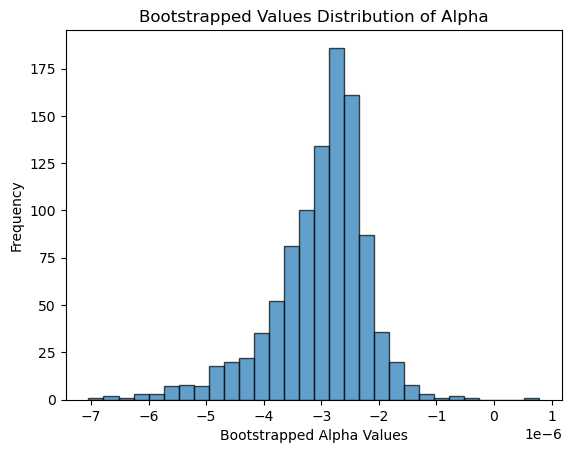

In [16]:

def alpha_func(D, idx):
   cov_ = np.cov(D[['salary','remote_ratio']].loc[idx], rowvar=False)
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

print(alpha_func(df, range(10000)))

np.random.seed(42)

bootstrap_values = []

def boot_SE(D, B=1000, seed=0):
    
    rng = np.random.default_rng(seed)
    n = D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = alpha_func(D, idx)
        bootstrap_values.append(value)
    return np.std(np.array(bootstrap_values))

alpha_SE = boot_SE(D=df, B=1000, seed=0)
print(alpha_SE)

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
ax.hist(bootstrap_values, bins=30, edgecolor='black', alpha=0.7)

# Add a title
#Add your code here
ax.set_title('Bootstrapped Values Distribution of Alpha')

# Add a label to the x-axis
#Add your code here
ax.set_xlabel('Bootstrapped Alpha Values')

# Add a label to the y-axis
#Add your code here
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

# Extract the variables
experience_level = df['experience_level']
salary = df['salary']

Text(0, 0.5, 'salary')

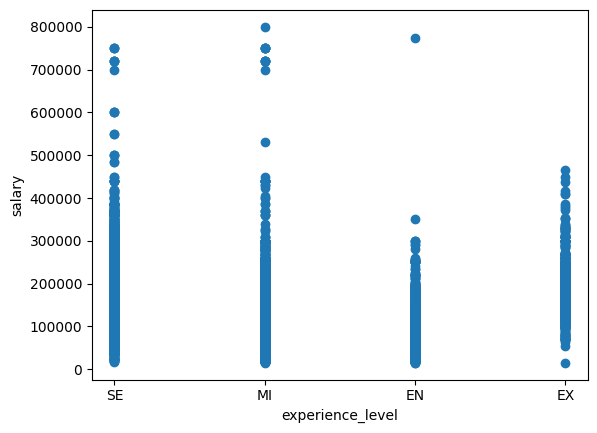

In [22]:
# Plot data
plt.scatter(df['experience_level'], df['salary_in_usd'], label='Data')
plt.xlabel('experience_level')
plt.ylabel('salary')

In [18]:
for predictor in df.columns.tolist():
    if (predictor != 'salary') & (predictor != 'job_title'):
      model = sm.OLS.from_formula('salary ~ ' + predictor, data=df)
      result = model.fit()
      print('======================= ' + predictor + ' ==================================================')  
      print(result.summary())

======================= work_year ==================================================
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     88.12
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           6.95e-21
Time:                        10:21:10   Log-Likelihood:            -2.3401e+05
No. Observations:               16534   AIC:                         4.680e+05
Df Residuals:                   16532   BIC:                         4.680e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [16]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.647
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           2.33e-06
Time:                        20:56:52   Log-Likelihood:            -2.3404e+05
No. Observations:               16534   AIC:                         4.681e+05
Df Residuals:                   16530   BIC:                         4.681e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.25

In [19]:
percnetile_99 = df.salary_in_usd.quantile(.99, interpolation="linear")
percnetile_99

337300.0

In [20]:
df_no_outlier = df[df.salary_in_usd < percnetile_99]
# df_no_outlier.decribe()
df_no_outlier.salary_in_usd.describe()

count     16366.000000
mean     146744.594464
std       61086.134713
min       15000.000000
25%      100000.000000
50%      140000.000000
75%      185000.000000
max      336400.000000
Name: salary_in_usd, dtype: float64

Text(0, 0.5, 'salary')

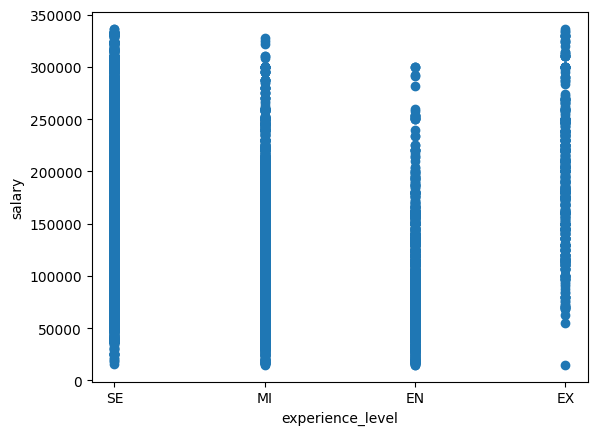

In [21]:
# Plot data
plt.scatter(df_no_outlier['experience_level'], df_no_outlier['salary_in_usd'], label='Data')
plt.xlabel('experience_level')
plt.ylabel('salary')

Text(0.5, 1.0, 'Salary in USD for exiprence level SE')

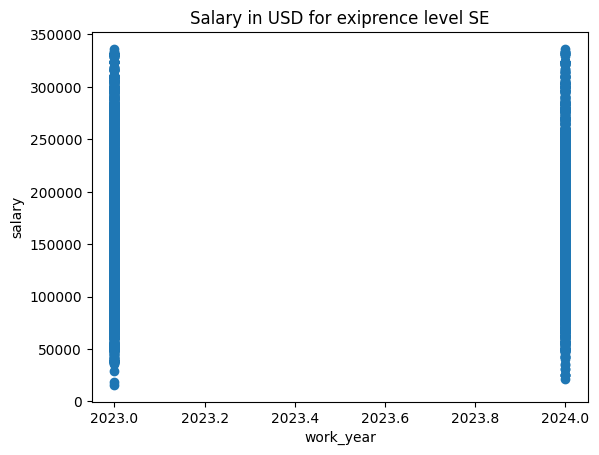

In [54]:
experience_level_se_salaries_to_years_se = df_no_outlier.query('work_year > 2022 and experience_level == "SE"')
# Plot data
plt.scatter(experience_level_se_salaries_to_years_se['work_year'], experience_level_se_salaries_to_years_se['salary_in_usd'], label='Data')
plt.xlabel('work_year')
plt.ylabel('salary')
plt.title("Salary in USD for exiprence level SE")

Text(0.5, 1.0, 'Salary in USD for exiprence level MI')

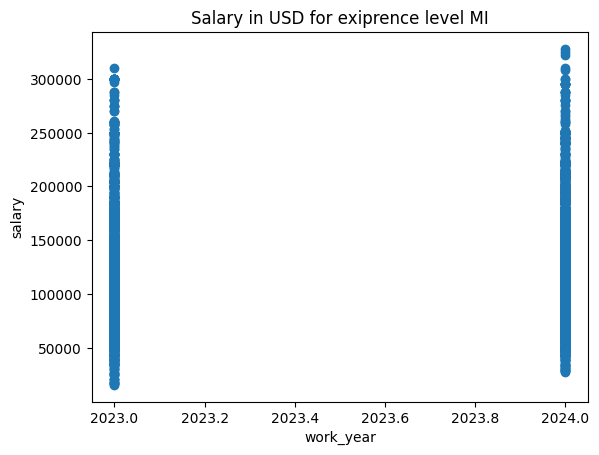

In [55]:
experience_level_se_salaries_to_years_mi = df_no_outlier.query('work_year > 2022 and experience_level == "MI"')
# Plot data
plt.scatter(experience_level_se_salaries_to_years_mi['work_year'], experience_level_se_salaries_to_years_mi['salary_in_usd'], label='Data')
plt.xlabel('work_year')
plt.ylabel('salary')
plt.title("Salary in USD for exiprence level MI")

Text(0.5, 1.0, 'Salary in USD for exiprence level EN')

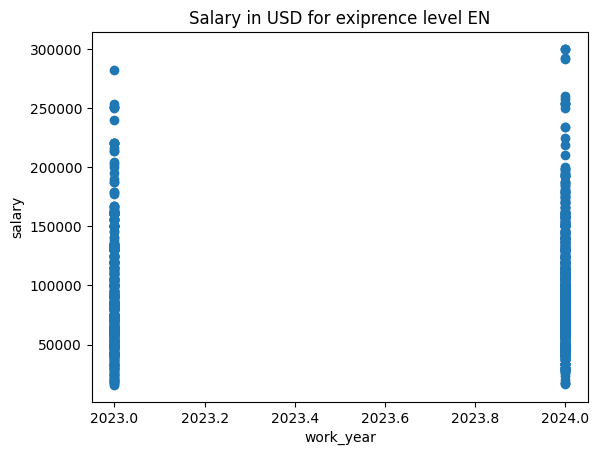

In [56]:
experience_level_se_salaries_to_years_en = df_no_outlier.query('work_year > 2022 and experience_level == "EN"')
# Plot data
plt.scatter(experience_level_se_salaries_to_years_en['work_year'], experience_level_se_salaries_to_years_en['salary_in_usd'], label='Data')
plt.xlabel('work_year')
plt.ylabel('salary')
plt.title("Salary in USD for exiprence level EN")

Text(0.5, 1.0, 'Salary in USD for exiprence level EX')

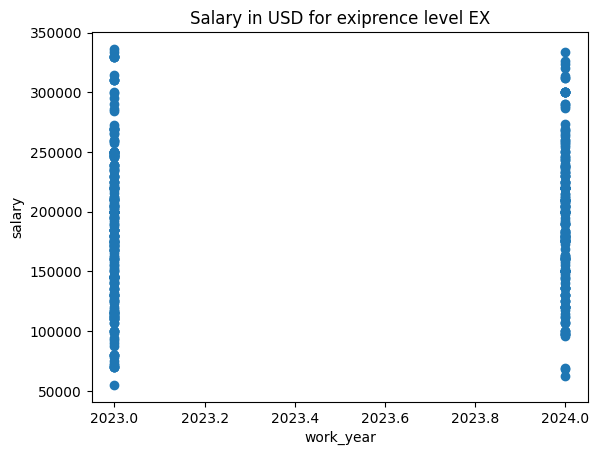

In [57]:
experience_level_se_salaries_to_years_ex = df_no_outlier.query('work_year > 2022 and experience_level == "EX"')
# Plot data
plt.scatter(experience_level_se_salaries_to_years_ex['work_year'], experience_level_se_salaries_to_years_ex['salary_in_usd'], label='Data')
plt.xlabel('work_year')
plt.ylabel('salary')
plt.title("Salary in USD for exiprence level EX")

Text(0.5, 1.0, 'Mean in USD for different exiprence level through years')

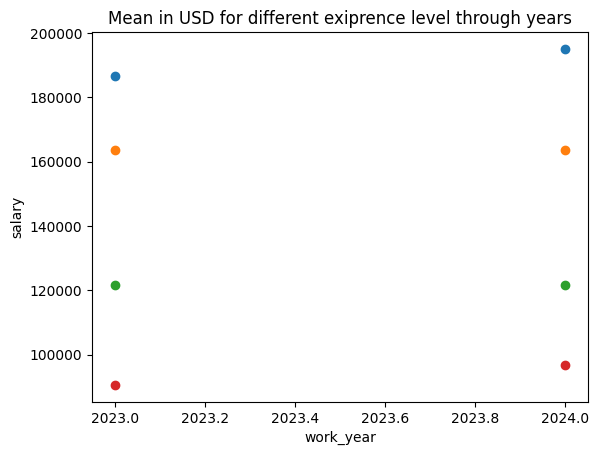

In [70]:
import statistics
experience_level_se_salaries_to_years_ex = df_no_outlier.query('work_year > 2022 and work_year < 2024 and experience_level == "EX"')
mean_2022_ex = statistics.mean(experience_level_se_salaries_to_years_ex['salary_in_usd'])
experience_level_se_salaries_to_years_ex = df_no_outlier.query('work_year > 2023 and experience_level == "EX"')
mean_2023_ex = statistics.mean(experience_level_se_salaries_to_years_ex['salary_in_usd'])
# Mean for SE
experience_level_se_salaries_to_years_se = df_no_outlier.query('work_year > 2022 and work_year < 2024 and experience_level == "SE"')
mean_2022_se = statistics.mean(experience_level_se_salaries_to_years_se['salary_in_usd'])
experience_level_se_salaries_to_years_ex = df_no_outlier.query('work_year > 2023 and experience_level == "SE"')
mean_2023_se = statistics.mean(experience_level_se_salaries_to_years_se['salary_in_usd'])
# Mean for MI
experience_level_se_salaries_to_years_mi = df_no_outlier.query('work_year > 2022 and work_year < 2024 and experience_level == "MI"')
mean_2022_mi = statistics.mean(experience_level_se_salaries_to_years_mi['salary_in_usd'])
experience_level_se_salaries_to_years_ex = df_no_outlier.query('work_year > 2023 and experience_level == "MI"')
mean_2023_mi = statistics.mean(experience_level_se_salaries_to_years_mi['salary_in_usd'])

# Mean for EN
experience_level_se_salaries_to_years_en = df_no_outlier.query('work_year > 2022 and work_year < 2024 and experience_level == "EN"')
mean_2022_en = statistics.mean(experience_level_se_salaries_to_years_en['salary_in_usd'])
experience_level_se_salaries_to_years_en = df_no_outlier.query('work_year > 2023 and experience_level == "EN"')
mean_2023_en = statistics.mean(experience_level_se_salaries_to_years_en['salary_in_usd'])

# Plot data
plt.scatter([2023, 2024], [mean_2022_ex, mean_2023_ex], label='Data')
plt.scatter([2023, 2024], [mean_2022_se, mean_2023_se], label='Data')
plt.scatter([2023, 2024], [mean_2022_mi, mean_2023_mi], label='Data')
plt.scatter([2023, 2024], [mean_2022_en, mean_2023_en], label='Data')

plt.xlabel('work_year')
plt.ylabel('salary')
plt.title("Mean in USD for different exiprence level through years")

In [53]:
work_yers = experience_level_se_salaries_to_years['work_year']
salary_for_ex = experience_level_se_salaries_to_years['salary_in_usd']
model = sm.OLS(work_yers,salary_for_ex)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              work_year   R-squared (uncentered):                   0.797
Model:                            OLS   Adj. R-squared (uncentered):              0.797
Method:                 Least Squares   F-statistic:                              4473.
Date:                Sat, 22 Jun 2024   Prob (F-statistic):                        0.00
Time:                        11:25:17   Log-Likelihood:                         -9386.9
No. Observations:                1140   AIC:                                  1.878e+04
Df Residuals:                    1139   BIC:                                  1.878e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [24]:
print(df_no_outlier.columns.tolist())

['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size', 'employee_company_location_match', 'job_function', 'job_seniority']
